##Import Libraries

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

##Load Model

In [ ]:
# Loading Pre-Trained ultralytics model.
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-18 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

#Make Detection

In [ ]:
#Asigning image to variable
img = 'https://media.istockphoto.com/photos/aerial-view-of-cars-in-traffic-picture-id159406920?s=612x612'

In [ ]:
#Detect what is in image.
results = model(img)
results.print()

image 1/1: 408x612 28 cars
Speed: 208.4ms pre-process, 310.8ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


<function matplotlib.pyplot.show(*args, **kw)>

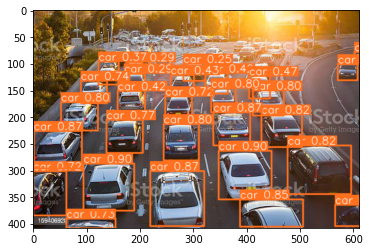

In [ ]:
#Show image of img variable and detection with bounding boxes and confidence levels
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

##Real Time Detection

In [ ]:
#Accessing our Webcam and allowing us to make detections in real time.

#cap = cv2.VideoCapture(0) // Accessing our webcam "My webcam is VideoCapture(0)"
####cap = cv2.VideoCapture("My_Video.mp4") // Real time detection from video.
#while cap.isOpened(): // Check if cam is open.
#  ret, frame = cap.read() // return value plus frame and we read.cap
#
#  cv2.imshow('YOLO', frame) // Top Bar is called YOLO 
#
#  if cv2.waitkey(10) & 0xFF == ord('q'):  // Exit gracefully and clean-up.
#    break
#  cap.release()
#  cv2.destroyAllWindows()

cap = cv2.VideoCapture(2)
while cap.isOpened():
  ret, frame = cap.read()

  #Make detections ---> parse what is captured by camera frame to YOLO model
  results = model(frame)

  #Return results numpy array squeezed

  cv2.imshow('YOLO', np.squeeze(results.render()))

  if cv2.waitkey(10) & 0xFF == ord('q'):
    break
  cap.release()
  cv2.destroyAllWindows()

##Train our Drowsiness Model

In [ ]:
#Collect some images and label them.

In [ ]:
import uuid #Create unique identifier (Name images).
import os   #Cleaner way to work with our file paths.
import time #Take a break between images done.

In [ ]:
# IMAGES_PATH = os.path.join('data', 'images') //Save our image data or add images in (/data/images)
# labels = ['awake', 'drowsy'] 
# number_imgs = 20

IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
#The next 2 code blocks are nested for loops.
#Outer for loop goes 2 times for label AWAKE & DROWSEY.
#Inner for loop goes ("number_imgs") times on each label each having 20 images.

In [ ]:
#Access our webcam and take a picture and store it in our data/images folder
# Make sure you create that folder on your pc (folder named data then inside another called images)

In [ ]:
#Loop through and collect images for awake first then for drowsy , collect 20 images for each.
      
                #Loop through labels

cap = cv2.VideoCapture(2)
for label in labels:       #looping through each of our labels
    print('Collecting images for {}'.format(label))  #See if we are collecting or transitioning through labels
    time.sleep(5)         # Sleep for 5 secs while transitioning from the labels

                  #Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        #WebCam feed
        ret, frame = cap.read()

        #We parse the folder, the image name and .jpg
        #We are concatenating using os the path, label,str unique item and .jpg

        #                                   |Create unique name for image|
        img_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+ '.jpg')

        #Writes out image to file
        cv2.imwrite(img_name, frame)

        #Render to the screen
        cv2.imshow('Image Collection', frame)

        #2sec delay between captures
        time.sleep(2)
        
        #Exit gracefully

        if cv2.waitkey(10) & 0xFF == ord('q'):
          break
cap.release()
cv2.destroyAllWindows()


DisabledFunctionError: ignored

In [ ]:
for label in labels:       #looping through each of our labels
    print('Collecting images for {}'.format(label))  #See if we are collecting or transitioning through labels
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        img_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+ '.jpg')
        print(img_name)


In [29]:
#Clone the label image package to your active directory 
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [ ]:
#Package is not fully installed, this code installs the dependencies
#pyqt5 is a GUI library
#lxml is a dependency of pyqt5
#second comand is working with our .qrc file installed by git command (cd from top file to get into till we get to our qrc file)
#----------------------------------------
#COMMANDS FOR MAC 
#brew install qt  # Install qt-5.x.x by Homebrew
#brew install libxml2
#
#or using pip
#
#pip3 install pyqt5 lxml # Install qt and lxml by pip
#
#make qt5py3
#python3 labelImg.py
#python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]
#----------------------------------------

!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
#Create another folder called labels inside our data folder.
#We are going to point lableimg to our images folder which contains our images collected from live feed and we will.
#put the labelled images to our labels folder.

In [ ]:
#first we cd into our cloned yolov5 model.
#We then rub the python train command in our yolov5/train file.
#Create dataset.yaml file in yolov5.
#epoch 411 it was good.
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

##Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
#Path to one of our images to see model performance 
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
#Parse img into model to make prediction 
results = model(img)

In [ ]:
#Print results
results.print()

In [ ]:
#Render image to screen
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

##Real Time Detections


In [ ]:
cap = cv2.VideoCapture(2)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Can improve model by adding more training data and tuning hyperparameters , e.g head to the side etc